In [2]:
# load the dataset

import pandas as pd

# Load the super dataset you generated
df = pd.read_csv("D:/COURSES/Brainovision/growmate/data/raw/growmate_super_dataset.csv")

# Quick check
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())


Shape of dataset: (600, 16)
Columns: ['plant_name', 'plant_type', 'soil_type', 'soil_ph', 'soil_nitrogen', 'soil_phosphorus', 'soil_potassium', 'plant_age_weeks', 'last_watered_days', 'temperature', 'humidity', 'rainfall', 'season', 'sunlight_exposure', 'pot_or_ground', 'watering_status']


In [3]:
# check for missing values

# Check if any column has missing/null values
print(df.isnull().sum())


plant_name           0
plant_type           0
soil_type            0
soil_ph              0
soil_nitrogen        0
soil_phosphorus      0
soil_potassium       0
plant_age_weeks      0
last_watered_days    0
temperature          0
humidity             0
rainfall             0
season               0
sunlight_exposure    0
pot_or_ground        0
watering_status      0
dtype: int64


In [4]:
# Split Features (X) and Target (y)

# Define features and target
X = df.drop("watering_status", axis=1)
y = df["watering_status"]
print(X.columns)
# print(y)

Index(['plant_name', 'plant_type', 'soil_type', 'soil_ph', 'soil_nitrogen',
       'soil_phosphorus', 'soil_potassium', 'plant_age_weeks',
       'last_watered_days', 'temperature', 'humidity', 'rainfall', 'season',
       'sunlight_exposure', 'pot_or_ground'],
      dtype='object')


In [9]:
# Encode Target Labels

from sklearn.preprocessing import LabelEncoder

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Optional: Check what labels are mapped to
print("Label Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Label Mapping: {0: 0, 1: 1, 2: 2}


In [10]:
# Scale Numerical Features

from sklearn.preprocessing import StandardScaler

# We'll scale only numeric (non-binary) columns
numeric_cols = [
    'soil_ph', 'soil_nitrogen', 'soil_phosphorus', 'soil_potassium',
    'plant_age_weeks', 'last_watered_days',
    'temperature', 'humidity', 'rainfall'
]

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


In [11]:
# Train-Test Split

from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 480
Testing samples: 120


In [2]:
!pip install lightgbm scikit-learn pandas numpy matplotlib seaborn

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)


In [17]:
!pip install --upgrade lightgbm

In [20]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of your dataset
df_encoded = df.copy()

# Columns that need encoding (categorical/object)
categorical_cols = ['plant_name', 'plant_type', 'soil_type', 'season', 'sunlight_exposure', 'pot_or_ground']

# Apply LabelEncoder to each
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Now split features and target
X = df_encoded.drop("watering_status", axis=1)
y = df_encoded["watering_status"]

# Encode target too
y_encoded = le.fit_transform(y)

# ✅ Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)



In [21]:
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate model
model = LGBMClassifier(
    objective='multiclass',
    num_class=3,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100
)

# Train with early stopping using callbacks
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[
        early_stopping(stopping_rounds=10),
        log_evaluation(period=10)
    ]
)

# Predict & evaluate
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1169
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 15
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [22]:
model = LGBMClassifier(
    objective='multiclass',
    num_class=3,
    learning_rate=0.05,
    max_depth=10,  # Increase depth
    n_estimators=300
)

In [27]:
from lightgbm import early_stopping, log_evaluation
from lightgbm import LGBMClassifier

# Define the model
model = LGBMClassifier(
    objective='multiclass',
    num_class=3,
    boosting_type='gbdt',
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

# Fit the model with callbacks for early stopping and logging
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='multi_logloss',
    callbacks=[
        early_stopping(stopping_rounds=10),
        log_evaluation(period=10)
    ]
)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.407976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1169
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 15
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

LGBMClassifier(num_class=3, objective='multiclass', random_state=42)

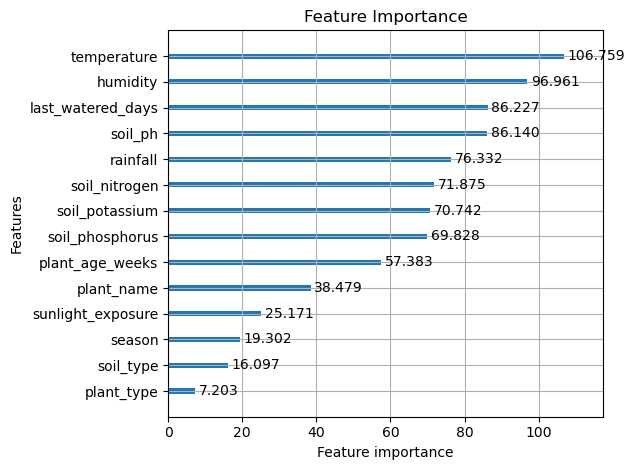

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

plot_importance(model.booster_, max_num_features=15, importance_type='gain')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [29]:
from sklearn.exceptions import NotFittedError

try:
    booster = model.booster_
    print("✅ Model is trained and ready!")
except NotFittedError:
    print("❌ Model is NOT trained yet.")


✅ Model is trained and ready!


In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.35833333333333334

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.33      0.34        40
           1       0.41      0.47      0.44        40
           2       0.30      0.28      0.29        40

    accuracy                           0.36       120
   macro avg       0.35      0.36      0.36       120
weighted avg       0.35      0.36      0.36       120


🧩 Confusion Matrix:
 [[13 13 14]
 [ 9 19 12]
 [15 14 11]]


In [ ]:
import joblib

joblib.dump(model, 'growmate_lightgbm_model.pkl')
print("💾 Model saved as 'growmate_lightgbm_model.pkl'")


💾 Model saved as 'growmate_lightgbm_model.pkl'


In [ ]:
import joblib
from sklearn.preprocessing import LabelEncoder

# Assuming you already fit these encoders during preprocessing
# Replace these variables with your actual fitted encoders
plant_encoder = LabelEncoder().fit(df['plant_name'])
plant_type_encoder = LabelEncoder().fit(df['plant_type'])
soil_type_encoder = LabelEncoder().fit(df['soil_type'])
season_encoder = LabelEncoder().fit(df['season'])
sunlight_encoder = LabelEncoder().fit(df['sunlight_exposure'])
pot_ground_encoder = LabelEncoder().fit(df['pot_or_ground'])

# Save each encoder
joblib.dump(plant_encoder, '../models/plant_encoder.pkl')
joblib.dump(plant_type_encoder, '../models/plant_type_encoder.pkl')
joblib.dump(soil_type_encoder, '../models/soil_type_encoder.pkl')
joblib.dump(season_encoder, '../models/season_encoder.pkl')
joblib.dump(sunlight_encoder, '../models/sunlight_encoder.pkl')
joblib.dump(pot_ground_encoder, '../models/pot_ground_encoder.pkl')

# Also save the label encoder for the target variable
label_encoder = LabelEncoder().fit(df['watering_status'])
joblib.dump(label_encoder, '../models/label_encoder.pkl')

print("✅ All encoders saved successfully!")

✅ All encoders saved successfully!
